In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib
import shap
from sklearn.model_selection import train_test_split

# Load the Random Forest model from the file
loaded_rf_model = joblib.load('random_forest_model.joblib')
display(loaded_rf_model)

RandomForestRegressor(random_state=42)

In [2]:
# Reading Data
df = pd.read_csv("sales_predictions.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
# Fixing inconsistencies in categorical data
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df = df.drop_duplicates()

# Features [X] & Target [y]
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [4]:
# One-hot encode categorical features
X = pd.get_dummies(X)

# Split your data into train and test sets (if not already done in Part 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Sample combined data
combined_train = pd.concat([X_train, y_train], axis=1)
sampled_train = combined_train.sample(100, random_state=42)

# Split sampled data into X_shap and y_shap
X_shap = sampled_train.drop(['Item_Outlet_Sales'], axis=1)
y_shap = sampled_train['Item_Outlet_Sales']

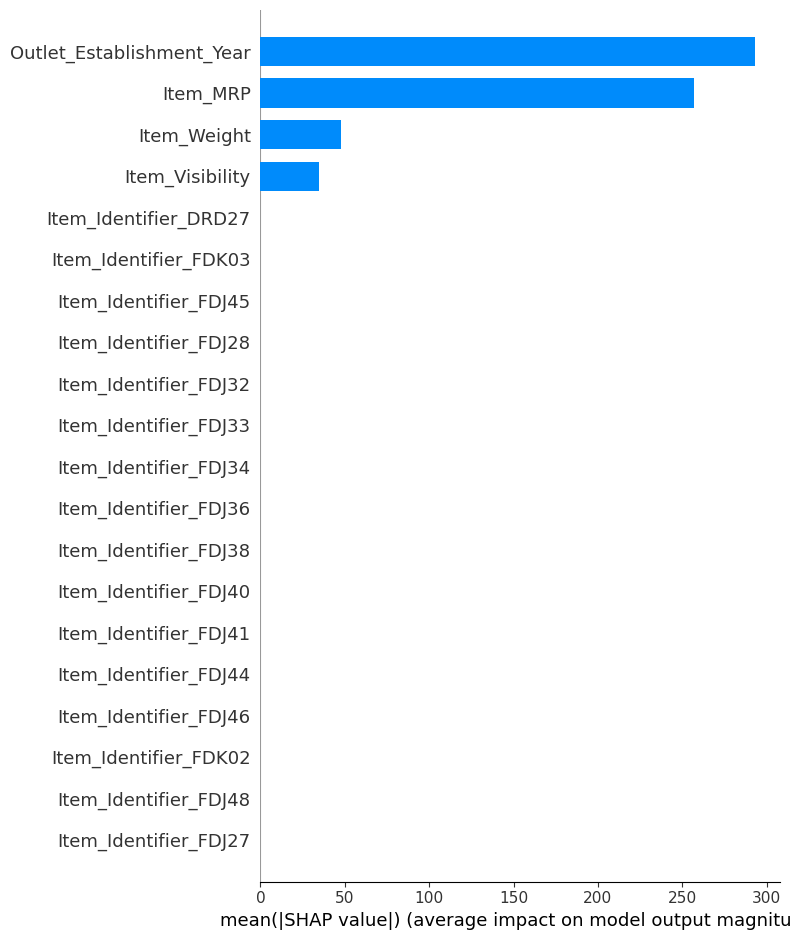

In [6]:
# Create a model explainer
explainer = shap.Explainer(loaded_rf_model, X_shap)

# Calculate the shap values for your model
shap_values = explainer(X_shap)

# Create a summary plot - with plot_type='bar'
shap.summary_plot(shap_values, X_shap, plot_type='bar')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


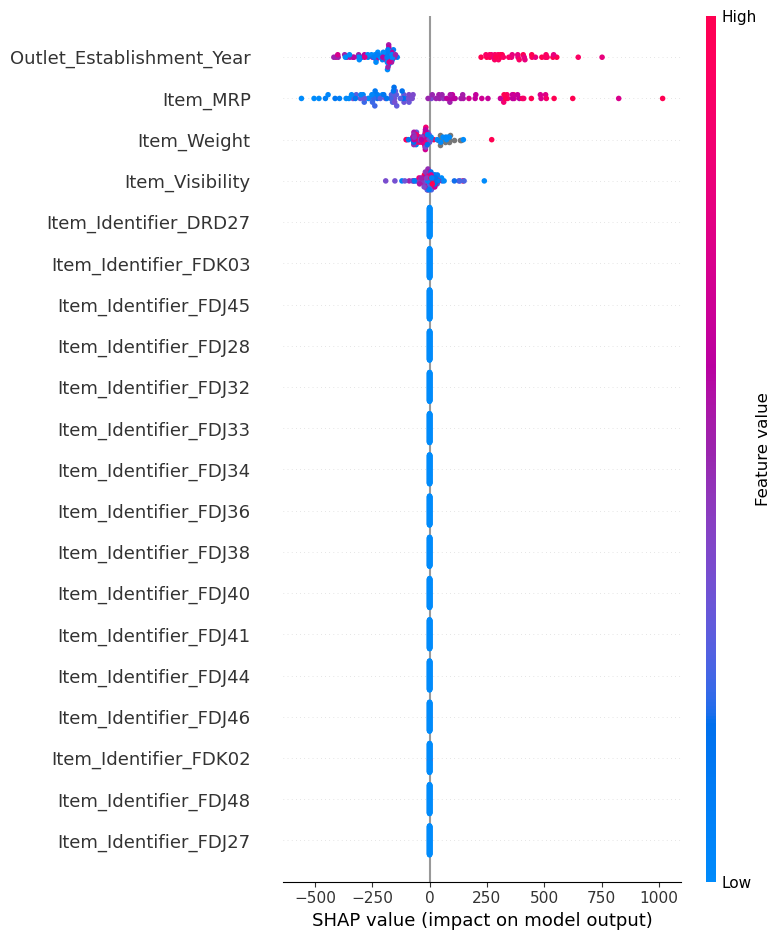

<Figure size 640x480 with 0 Axes>

In [7]:
shap.summary_plot(shap_values, X_shap, plot_type='dot')
plt.savefig("shap_dotplot.png")

In [8]:
# Extract mean absolute SHAP values
mean_shap_values = np.abs(shap_values.values).mean(axis=0)
shap_summary = pd.DataFrame(mean_shap_values, index=X_shap.columns, columns=["Mean SHAP Value"]).sort_values(by="Mean SHAP Value", ascending=False)
print(shap_summary)

                               Mean SHAP Value
Outlet_Establishment_Year           293.200060
Item_MRP                            256.956450
Item_Weight                          47.608566
Item_Visibility                      34.938218
Item_Identifier_DRD27                 0.001527
...                                        ...
Item_Identifier_FDJ40                 0.000000
Item_Identifier_FDJ38                 0.000000
Item_Identifier_FDJ36                 0.000000
Item_Identifier_FDJ34                 0.000000
Outlet_Type_Supermarket Type3         0.000000

[1601 rows x 1 columns]


In [9]:
instance_index = 5  # Example: 5th instance in your SHAP sample
shap_values_instance = pd.Series(shap_values.values[instance_index], index=X_shap.columns)
print(shap_values_instance)

Item_Weight                      -18.416976
Item_Visibility                    3.194825
Item_MRP                        -199.843916
Outlet_Establishment_Year       -183.798270
Item_Identifier_DRA12              0.000000
                                    ...    
Outlet_Location_Type_Tier 3        0.000000
Outlet_Type_Grocery Store          0.000000
Outlet_Type_Supermarket Type1      0.000000
Outlet_Type_Supermarket Type2      0.000000
Outlet_Type_Supermarket Type3      0.000000
Length: 1601, dtype: float64


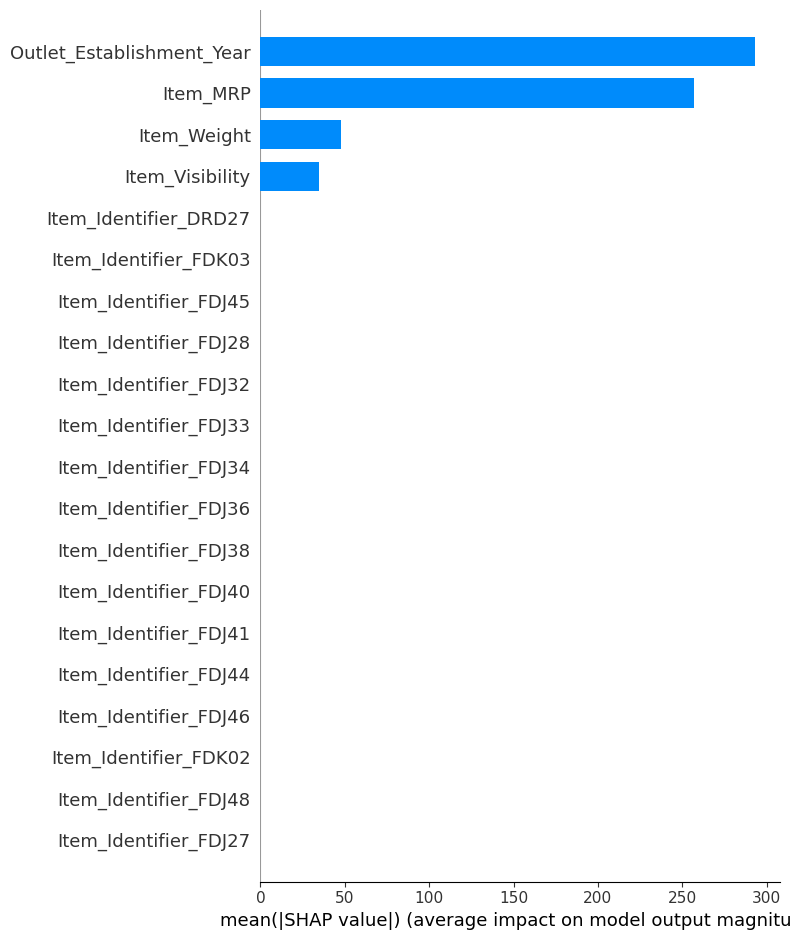

In [10]:
shap.summary_plot(shap_values, X_shap, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


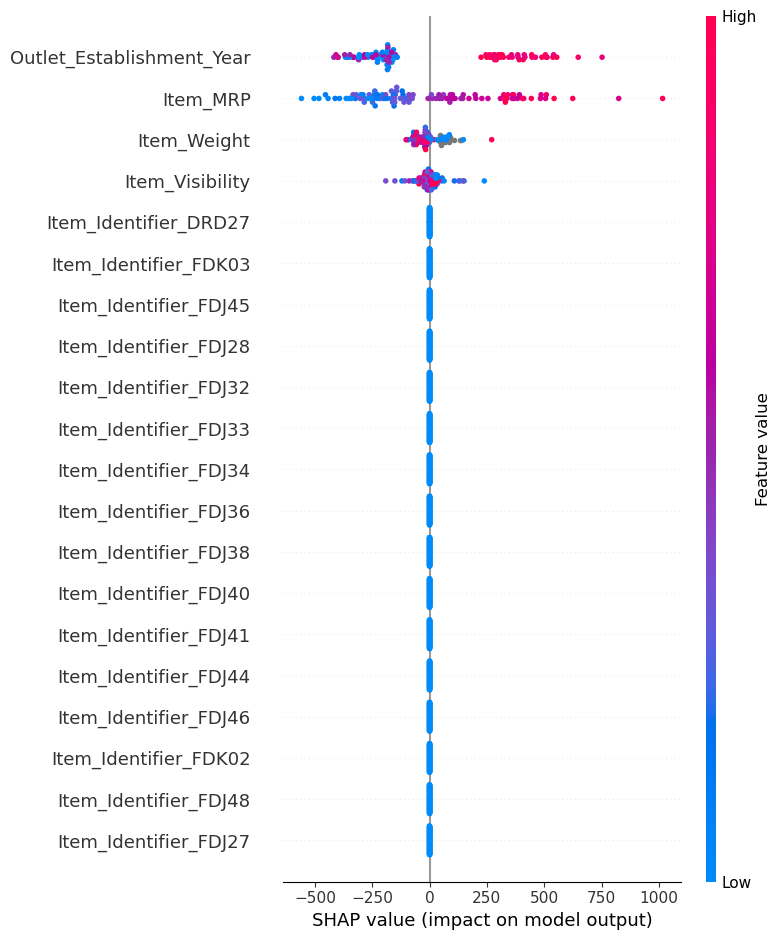

In [11]:
shap.summary_plot(shap_values, X_shap)

### Mean Absolute SHAP Values:
- **Outlet_Establishment_Year**: The establishment year significantly influences predictions with an impact of ~293.2.


- **Item_MRP**: MRP is the next influential feature with an impact of ~256.96.


- **Item_Weight & Item_Visibility**: Both influence predictions with impacts of ~47.61 and ~34.94, respectively.
- Features like many `Item_Identifier` values have negligible influence.

### SHAP Values for the 5th Instance:
- **Item_Weight**: Decreases the prediction by ~18.42 units.


- **Item_Visibility**: Increases the prediction by ~3.19 units.


- **Item_MRP**: Decreases the prediction substantially by ~199.84 units.


- **Outlet_Establishment_Year**: Reduces the prediction by ~183.8 units.

# Local Explanations

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import shap
import lime
import lime.lime_tabular

# Reading Data
df = pd.read_csv("sales_predictions.csv")
# Fixing inconsistencies in categorical data
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df = df.drop_duplicates()

In [13]:
# Features [X] & Target [y]
drop_feats = ['Item_Identifier', 'Item_Outlet_Sales']  # Adjust the feature names
y = df['Item_Outlet_Sales'].copy()
X = df.drop(columns=['Item_Outlet_Sales', *drop_feats]).copy()

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing Pipeline
num_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
cat_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])
cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', num_pipeline, num_features), ('cat', cat_pipeline, cat_features)])

In [15]:
# Fit the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [16]:
# Tree-Based Model - Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_preprocessed, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# Load the model explainer
explainer = shap.Explainer(rf_reg, X_test_preprocessed)

In [18]:
# Reset the indices of X_test_preprocessed
X_test_preprocessed_reset = pd.DataFrame(X_test_preprocessed, columns=num_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(input_features=cat_features)))
X_test_preprocessed_reset.index = X_test.index  # Resetting indices to match X_test

In [19]:
# Select example rows with low and high sales
low_sales_index = y_test.idxmin()
high_sales_index = y_test.idxmax()
low_sales_example = X_test_preprocessed_reset.loc[[low_sales_index]]
high_sales_example = X_test_preprocessed_reset.loc[[high_sales_index]]

In [20]:
# Initialize the LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train_preprocessed, mode="regression")
# Explain the example with low sales using LIME
low_sales_lime_exp = lime_explainer.explain_instance(low_sales_example.values[0], rf_reg.predict)
# Explain the example with high sales using LIME
high_sales_lime_exp = lime_explainer.explain_instance(high_sales_example.values[0], rf_reg.predict)

In [21]:
# Save Lime explanation plots as screenshots
low_sales_lime_exp.save_to_file("low_sales_lime_explanation.png")
high_sales_lime_exp.save_to_file("high_sales_lime_explanation.png")
print("Low sales index:", low_sales_index)
print("High sales index:", high_sales_index)

Low sales index: 6950
High sales index: 1450


In [22]:
# Generate individual SHAP force plots for the examples
shap.initjs()

low_sales_shap_values = explainer.shap_values(X_test_preprocessed_reset.loc[[low_sales_index]])
shap.force_plot(explainer.expected_value, low_sales_shap_values, X_test_preprocessed_reset.loc[[low_sales_index]], show=False)
plt.show()  # Display the plot
plt.savefig("low_sales_shap_force_plot.png")  # Save the plot as PNG
plt.clf()  # Clear the plot

high_sales_shap_values = explainer.shap_values(X_test_preprocessed_reset.loc[[high_sales_index]])
shap.force_plot(explainer.expected_value, high_sales_shap_values, X_test_preprocessed_reset.loc[[high_sales_index]], show=False)
plt.show()  # Display the plot
plt.savefig("high_sales_shap_force_plot.png")  # Save the plot as PNG
plt.clf()  # Clear the plot

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>